In [1]:
import pandas as pd

# Load data
df = pd.read_csv("FAZ_POEMS_REVIEW - FAZ_POEMS_Grouped.csv")

# Function to count non-empty lines
def count_lines(text):
    if pd.isna(text):
        return 0
    return len([line for line in text.split('\n') if line.strip() != ''])

# Apply line count
df['line_count'] = df['Poem_line_cleaned'].apply(count_lines)

# Descriptive stats
stats = {
    'min_lines': df['line_count'].min(),
    'max_lines': df['line_count'].max(),
    'mean_lines': df['line_count'].mean(),
    'median_lines': df['line_count'].median(),
    'std_lines': df['line_count'].std(),
    'total_poems': len(df),
    'poems_with_0_lines': (df['line_count'] == 0).sum()
}

# Frequency distribution (top 10 most common line counts)
freq = df['line_count'].value_counts().sort_index().head(10)

print("Poem Line Count Statistics:")
for k, v in stats.items():
    print(f"{k}: {v:.2f}" if isinstance(v, float) else f"{k}: {v}")

print("\nTop 10 Line Counts (Frequency):")
print(freq)

Poem Line Count Statistics:
min_lines: 2
max_lines: 103
mean_lines: 11.94
median_lines: 10.00
std_lines: 10.36
total_poems: 353
poems_with_0_lines: 0

Top 10 Line Counts (Frequency):
line_count
2     25
3     13
4     11
5      9
6     16
7     16
8     48
9     32
10    43
11    22
Name: count, dtype: int64



📊 LINE COUNT STATISTICS:
count    353.000000
mean      11.940510
std       10.361608
min        2.000000
25%        7.000000
50%       10.000000
75%       14.000000
max      103.000000
Name: line_count, dtype: float64

➡ Total poems: 353
➡ Poems with 0 lines: 0


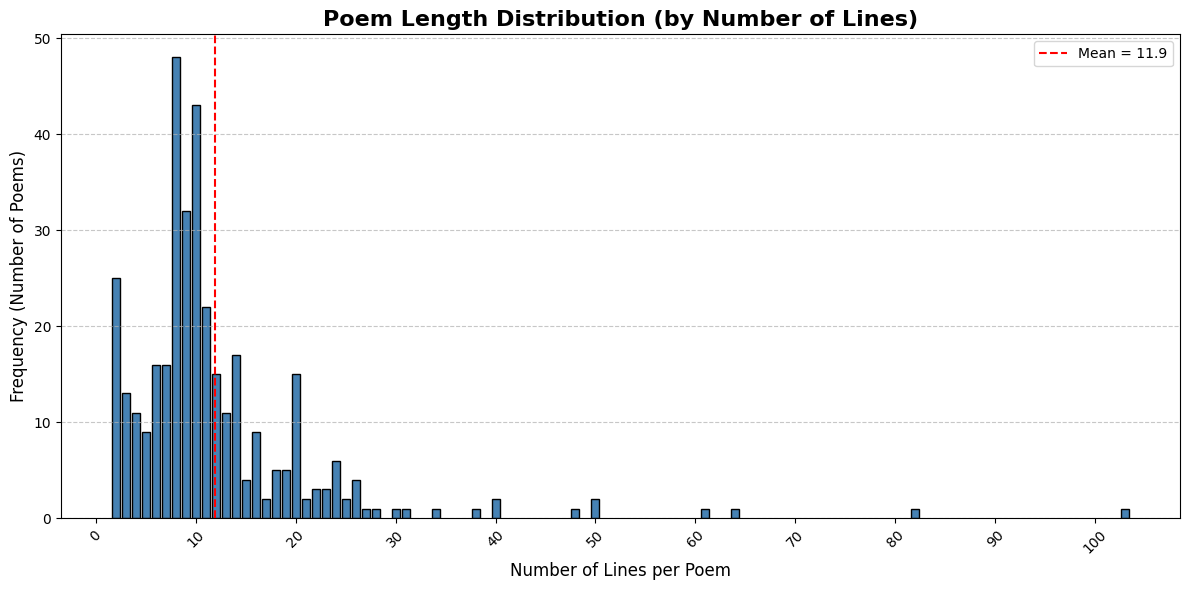


🔝 Top 20 Most Frequent Line Counts:
  8 lines → 48 poems
  10 lines → 43 poems
  9 lines → 32 poems
  2 lines → 25 poems
  11 lines → 22 poems
  14 lines → 17 poems
  7 lines → 16 poems
  6 lines → 16 poems
  20 lines → 15 poems
  12 lines → 15 poems
  3 lines → 13 poems
  4 lines → 11 poems
  13 lines → 11 poems
  5 lines → 9 poems
  16 lines → 9 poems
  24 lines → 6 poems
  19 lines → 5 poems
  18 lines → 5 poems
  26 lines → 4 poems
  15 lines → 4 poems


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# ----------------------------
# 1. Load Data
# ----------------------------
df = pd.read_csv("FAZ_POEMS_REVIEW - FAZ_POEMS_Grouped.csv")

# ----------------------------
# 2. Count non-empty lines per poem
# ----------------------------
def count_lines(text):
    if pd.isna(text):
        return 0
    return len([line for line in text.split('\n') if line.strip() != ''])

df['line_count'] = df['Poem_line_cleaned'].apply(count_lines)

# ----------------------------
# 3. Print Statistics
# ----------------------------
stats = df['line_count'].describe()
print("\n📊 LINE COUNT STATISTICS:")
print(stats)
print(f"\n➡ Total poems: {len(df)}")
print(f"➡ Poems with 0 lines: {(df['line_count'] == 0).sum()}")

# ----------------------------
# 4. Plot Detailed Distribution
# ----------------------------
plt.figure(figsize=(12, 6))

# Get frequency for each line count
value_counts = df['line_count'].value_counts().sort_index()

# Use bar plot for exact control
plt.bar(value_counts.index, value_counts.values, color='steelblue', edgecolor='black', width=0.8)

# Labels and formatting
plt.title("Poem Length Distribution (by Number of Lines)", fontsize=16, weight='bold')
plt.xlabel("Number of Lines per Poem", fontsize=12)
plt.ylabel("Frequency (Number of Poems)", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Improve x-axis readability
max_line = df['line_count'].max()
if max_line <= 50:
    plt.xticks(np.arange(0, max_line + 1, 1), rotation=45)
else:
    # For wide range, show ticks every 5 or 10
    step = 5 if max_line <= 100 else 10
    plt.xticks(np.arange(0, max_line + 1, step), rotation=45)

# Annotate key stats on plot (optional)
mean_val = df['line_count'].mean()
plt.axvline(mean_val, color='red', linestyle='--', label=f'Mean = {mean_val:.1f}')
plt.legend()

plt.tight_layout()
plt.savefig("poem_line_distribution.png", dpi=300)  # High-res export
plt.show()

# ----------------------------
# 5. Show Top 20 Most Common Lengths
# ----------------------------
print("\n🔝 Top 20 Most Frequent Line Counts:")
top20 = df['line_count'].value_counts().sort_values(ascending=False).head(20)
for lines, freq in top20.items():
    print(f"  {lines} lines → {freq} poems")

In [13]:
import pandas as pd
import math

df = pd.read_csv("FAZ_POEMS_REVIEW - FAZ_POEMS_Lines_Cleaned.csv")

required = ['poem_id', 'Row_ID', 'Title_cleaned', 'Poem_line_cleaned']
for col in required:
    if col not in df.columns:
        raise ValueError(f"Missing column: {col}")

df = df.sort_values(['poem_id', 'Row_ID']).reset_index(drop=True)
df['Poem_line_cleaned'] = df['Poem_line_cleaned'].fillna('').astype(str)

all_records = []

for poem_id, group in df.groupby('poem_id'):
    title = group['Title_cleaned'].dropna().iloc[0] if not group['Title_cleaned'].dropna().empty else "Untitled"
    poem_lines = list(zip(group['Row_ID'], group['Poem_line_cleaned']))
    n = len(poem_lines)
    
    if n == 0:
        all_records.append({
            'poem_id': poem_id,
            'Title_cleaned': title,
            'Poem_full': "",
            'poem_lines_subset': ""
        })
    else:
        full_raw = '\n'.join(line for _, line in poem_lines)
        
        def format_subset(lines_chunk):
            if not lines_chunk:
                return ""
            formatted = [f'"{rid}":"{line}"' for rid, line in lines_chunk]
            # Add comma to all lines except the last
            if len(formatted) == 1:
                return formatted[0]
            return ',\n'.join(formatted)  # ← This gives: line1,\nline2,\nline3

        if n <= 10:
            all_records.append({
                'poem_id': poem_id,
                'Title_cleaned': title,
                'Poem_full': full_raw,
                'poem_lines_subset': format_subset(poem_lines)
            })
        elif n <= 20:
            mid = n // 2
            first_half = poem_lines[:mid]
            second_half = poem_lines[mid:]
            
            all_records.append({
                'poem_id': poem_id,
                'Title_cleaned': title,
                'Poem_full': full_raw,
                'poem_lines_subset': format_subset(first_half)
            })
            all_records.append({
                'poem_id': poem_id,
                'Title_cleaned': title,
                'Poem_full': full_raw,
                'poem_lines_subset': format_subset(second_half)
            })
        else:
            for i in range(0, n, 10):
                chunk = poem_lines[i:i+10]
                all_records.append({
                    'poem_id': poem_id,
                    'Title_cleaned': title,
                    'Poem_full': full_raw,
                    'poem_lines_subset': format_subset(chunk)
                })

output_df = pd.DataFrame(all_records)
output_df.to_csv("FAZ_POEMS_Expanded_for_AI.csv", index=False, encoding='utf-8-sig')

print(f"✅ Done! {len(output_df)} rows generated.")

✅ Done! 561 rows generated.
